[ 1.8589917e-04  1.2186541e-04 -4.2643592e-06 ...  2.7502218e-04
  3.4186023e-04  1.9753701e-04]
110250
Sample rate (KHz): 22050
Audio length (seconds): 5.00


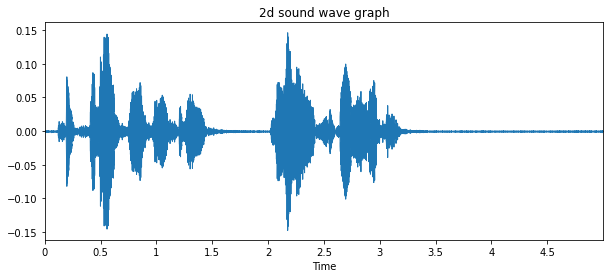

In [2]:
# 빵형 영상 실습하자 !

# https://youtu.be/IE6lue0qusQ
# https://colab.research.google.com/drive/1pC4pJHAIA8e0zdD02kFXu7fngrMguOnx?usp=sharing

# Dataset:
# GTZAN: https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification

# -----------------------------------------------------------------------------------
# 오디오 파일을 이해하자!
import librosa

# y: 소리가 떨리는 세기(진폭)를 시간 순서대로 나열한 것
# Sampling rate(sr): 1초당 샘플의 개수, 단위 Hz 또는 kHz
y, sr = librosa.load('C:/nmb/data/pansori/7KCV6riw7KCV/GJu8ZETMTZU/7KCV6riw7KCV-GJu8ZETMTZU-0036.flac'\
                    , sr=22050) # sr default 값이 22050이다.
                                # 왜?? > https://m.blog.naver.com/PostView.nhn?blogId=satusfree5&logNo=220623885225&proxyReferer=https:%2F%2Fwww.google.com%2F


# 데이터 음성 성별: 남성
# 문구 : 특히나 이 공식은 매우 익숙해 있는거죠

print(y)
print(len(y))
# [ 1.8589917e-04  1.2186541e-04 -4.2643592e-06 ...  2.7502218e-04
#   3.4186023e-04  1.9753701e-04]
# 110250

print('Sample rate (KHz): %d' % sr)
print('Audio length (seconds): %.2f' % (len(y) / sr))
# Sample rate (KHz) 1초당 샘플의 개수 : 22050
# Audio length (seconds): 5.00

# ====================================
# 음악 들어보기 #colab용!
# IPython: Interactive Python
# import IPython.display as ipd
# ipd.Audio(y, rate=sr)

# ====================================
# 1) 2D 음파 그래프
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(10, 4))
plt.title('2d sound wave graph')
librosa.display.waveplot(y=y, sr=sr)
plt.show()



(1025, 216)


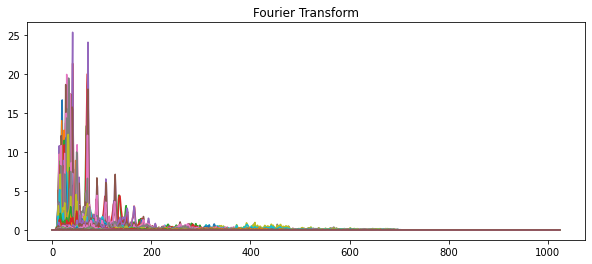

In [3]:
# ====================================
# 2) Fourier Transform
# 시간 영역 데이터를 주파수 영역으로 변경
# y축 : 주파수(로그 스케일)
# color축 : 데시벨(진폭)

import numpy as np

D = np.abs(librosa.stft(y, n_fft=2048, hop_length=512))
# np.abs: 절대값 반환 / STFT: Short-time Fourier transform / fft : fast Fourier transform
# 2048/512 = 4  의미 있는 숫자일까?
print(D.shape)
# (1025, 216)
# D: np.ndarray [shape=(1 + n_fft/2, n_frames), dtype=dtype]

plt.figure(figsize=(10, 4))
plt.title('Fourier Transform')
plt.plot(D)
plt.show()


C:\Users\lemon\anaconda3\envs\project\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\lemon\anaconda3\envs\project\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\lemon\anaconda3\envs\project\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


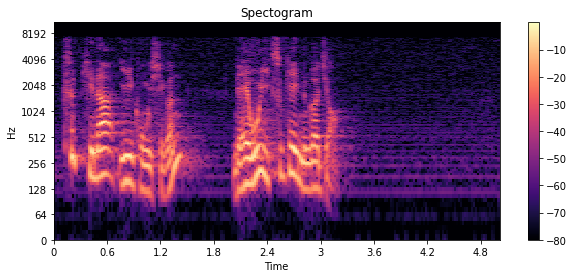

In [4]:
# ====================================
# 3) Spectogram
# 시간에 따른 신호 주파수의 스펙트럼 그래프
# 다른 이름: Sonographs, Voiceprints, Voicegrams

DB = librosa.amplitude_to_db(D, ref=np.max)
# db = decibel / amplitude_to_db : 진폭은 데시벨 스케일로 변환

plt.figure(figsize=(10, 4))
plt.title('Spectogram')
librosa.display.specshow(DB, sr=sr, hop_length=512, x_axis='time', y_axis='log')
plt.colorbar() # 오른쪽 바 표시하려고!
plt.show()


C:\Users\lemon\anaconda3\envs\project\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\lemon\anaconda3\envs\project\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\lemon\anaconda3\envs\project\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


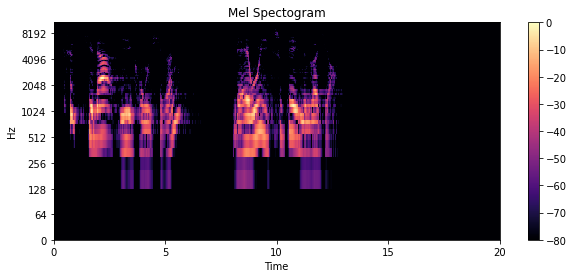

tempo:  103.359375


In [13]:

# ====================================
# 4) Mel Spectogram
# (인간이 이해하기 힘든) Spectogram의 y축을 Mel Scale로 변환한 것 (Non-linear transformation)
# Mel Scale: https://newsight.tistory.com/294

S = librosa.feature.melspectrogram(y, sr=sr, n_fft=512, hop_length=128, center=True)
S_DB = librosa.amplitude_to_db(S, ref=np.max)

plt.figure(figsize=(10, 4))
plt.title('Mel Spectogram')
librosa.display.specshow(S_DB, sr=sr, hop_length=512, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()

# -----------------------------------------------------------------------------------
# 오디오의 특성을 추출해보자! (Audio Feature Extraction)

# 1) Tempo (BPM: 분당 비트(Beats Per Minute) )
tempo, _ = librosa.beat.beat_track(y, sr=sr)
print('tempo: ', tempo)
# tempo:  103.359375

zero_crossings:  [False False  True ... False False False]
sum(zero_crossings):  14628
sum(zero_crossings):  3


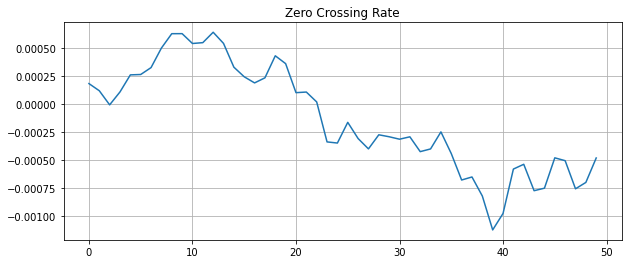

In [6]:
# ====================================
# 2) Zero Crossing Rate: 음파가 양에서 음으로 또는 음에서 양으로 바뀌는 비율
zero_crossings = librosa.zero_crossings(y, pad=False)
print('zero_crossings: ', zero_crossings)
print("sum(zero_crossings): ", sum(zero_crossings))
# zero_crossings:  [False False  True ... False False False]
# sum(zero_crossings):  14628

# 제로 크로싱 레이트를 확대해서 보자
n0 = 0
n1 = 50
plt.figure(figsize=(10,4))
plt.title('Zero Crossing Rate')
plt.plot(y[n0:n1])
plt.grid()
# plt.show()
# 확대한 부분은 몇번 교차 했을까?
zero_crossings = librosa.zero_crossings(y[n0:n1], pad=False)
print("sum(zero_crossings): ", sum(zero_crossings))
# sum(zero_crossings): 3

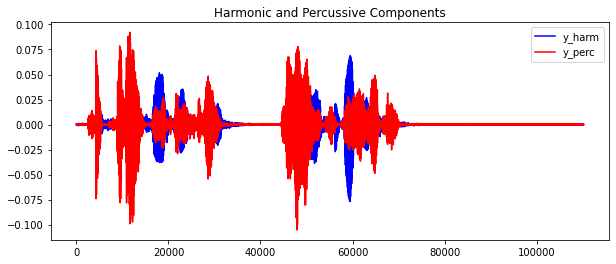

In [7]:
# ====================================
# 3) Harmonic and Percussive Components
# Harmonics: 사람의 귀로 구분할 수 없는 특징들 (음악의 색깔)
# Percussives: 리듬과 감정을 나타내는 충격파 / Components: 요소

y_harm, y_perc = librosa.effects.hpss(y)
# hpss: Harmonic-percussive source separation

plt.figure(figsize=(10,4))
plt.title('Harmonic and Percussive Components')
plt.plot(y_harm, color='b')
plt.plot(y_perc, color='r')
plt.legend(['y_harm', 'y_perc'])
plt.show()


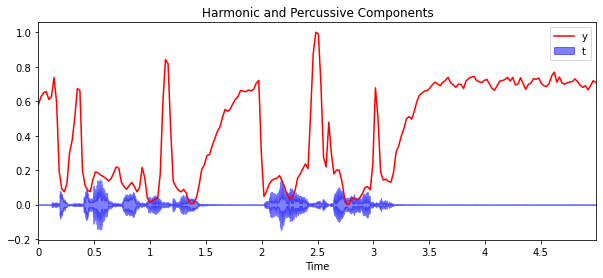

In [8]:
# ====================================
# 4) Spectral Centroid
# 소리를 주파수 표현했을 때, 주파수의 가중평균을 계산하여 소리의 "무게 중심"이 어딘지를 알려주는 지표
# 예를 들어, 블루스 음악은 무게 중심이 가운데 부분에 놓여있는 반면, 메탈 음악은 (끝 부분에서 달리기 때문에) 노래의 마지막 부분에 무게 중심이 실린다

spectral_centroids = librosa.feature.spectral_centroid(y, sr=sr)[0]

# 시각화를위한 시간 변수 계산
frames = range(len(spectral_centroids))

# 프레임 수를 시간(초)으로 변환
t = librosa.frames_to_time(frames)

import sklearn
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

plt.figure(figsize=(10, 4))
plt.title('Harmonic and Percussive Components')
librosa.display.waveplot(y, sr=sr, alpha=0.5, color='b')
plt.plot(t, normalize(spectral_centroids), color='r')
plt.legend(['y', 't'])
plt.show()

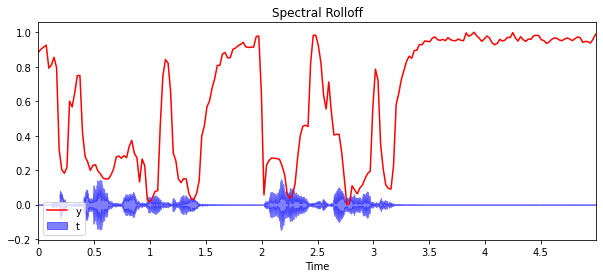

In [9]:
# ====================================
# 5) Spectral Rolloff(굴러 떨어지다)
# 신호 모양을 측정한다
# 총 스펙트럴 에너지 중 낮은 주파수(85% 이하)에 얼마나 많이 집중되어 있는가

spectral_rolloff = librosa.feature.spectral_rolloff(y, sr=sr)[0]

plt.figure(figsize=(10, 4))
plt.title('Spectral Rolloff')
librosa.display.waveplot(y, sr=sr, alpha=0.5, color='b')
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.legend(['y', 't'])
plt.show()

mean: 0.54
var: 0.05


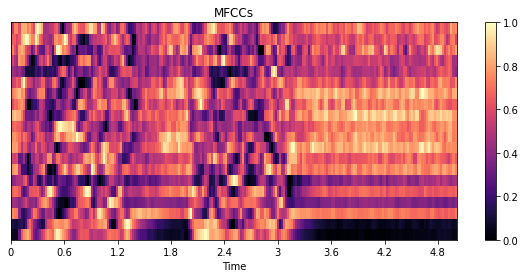

In [10]:
# ====================================
# 6) Mel-Frequency Cepstral Coefficients (MFCCs)
# MFCCs는 특징들의 작은 집합(약 10-20)으로 스펙트럴 포곡선의 전체적인 모양을 축약하여 보여준다
# 사람의 청각 구조를 반영하여 음성 정보 추출
# https://tech.kakaoenterprise.com/66

mfccs = librosa.feature.mfcc(y, sr=sr)
mfccs = normalize(mfccs, axis=1)

print('mean: %.2f' % mfccs.mean())
print('var: %.2f' % mfccs.var())

plt.figure(figsize=(10,4))
plt.title('MFCCs')
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.show()

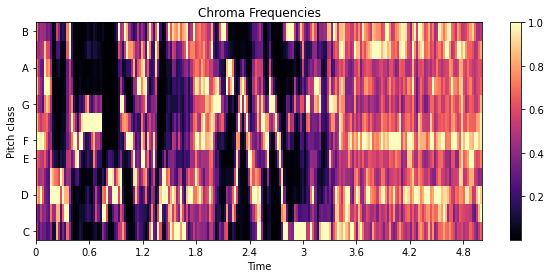

In [11]:
# ====================================
# 7) Chroma Frequencies
# 크로마 특징은 음악의 흥미롭고 강렬한 표현이다
# 크로마는 인간 청각이 옥타브 차이가 나는 주파수를 가진 두 음을 유사음으로 인지한다는 음악이론에 기반한다
# 모든 스펙트럼을 12개의 Bin으로 표현한다
# 12개의 Bin은 옥타브에서 12개의 각기 다른 반음(Semitones=Chroma)을 의미한다

chromagram = librosa.feature.chroma_stft(y, sr=sr, hop_length=512)

plt.figure(figsize=(10,4))
plt.title('Chroma Frequencies')
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=512)
plt.colorbar()
plt.show()